In [1]:
"""
To make sure the fusion decomposition works
up to the part where we would stitch the sublimbs together into one limb


"""

'\nTo make sure the fusion decomposition works\nup to the part where we would stitch the sublimbs together into one limb\n\n\n'

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
import skeleton_utils as sk
import soma_extraction_utils as sm
import trimesh_utils as tu
import trimesh
import numpy_utils as nu
import numpy as np
from importlib import reload
import networkx as nx
import time
import compartment_utils as cu
import networkx_utils as xu
import matplotlib_utils as mu
import neuron_utils as nru

#importing at the bottom so don't get any conflicts
import itertools
from tqdm_utils import tqdm

#for meshparty preprocessing
import meshparty_skeletonize as m_sk
import general_utils as gu
import compartment_utils as cu
from meshparty import trimesh_io
from copy import deepcopy


from neuron_utils import *


# Loading the Neuron

In [4]:
import trimesh_utils as tu
curent_neuron = tu.load_mesh_no_processing("/notebooks/test_neurons/Segmentation_2/864691135738362516_thin_long_down_axon.off")
segment_id = 864691135738362516
description = "thin_long_down_axon"

In [5]:
import neuron_visualizations as nviz
nviz.plot_objects(main_mesh=curent_neuron)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Setting the Arguments that would be present inside a preprocessing function call

In [6]:
#predefined arguments for the Neuron constructor

decomposition_type="meshafterparty"
mesh_correspondence="meshparty" #meshafterparty_adaptive
distance_by_mesh_center=True #how the distance is calculated for mesh correspondence
meshparty_segment_size = 100
meshparty_n_surface_downsampling = 2
meshparty_adaptive_correspondence_after_creation=False
suppress_preprocessing_print=True
computed_attribute_dict=None
somas = None
branch_skeleton_data=None
combine_close_skeleton_nodes = True
combine_close_skeleton_nodes_threshold=700
ignore_warnings=True
suppress_output=False
calculate_spines=True
widths_to_calculate=["no_spine_median_mesh_center",
                "no_spine_mean_mesh_center"]
fill_hole_size=2000

In [7]:
#arguments for the preprocess neuron
mesh = curent_neuron
segment_id=segment_id
description=description

sig_th_initial_split=15 #for significant splitting meshes in the intial mesh split
limb_threshold = 2000 #the mesh faces threshold for a mesh to be qualified as a limb (otherwise too small)
filter_end_node_length=4001 #used in cleaning the skeleton during skeletonizations
return_no_somas = False

decomposition_type=decomposition_type
mesh_correspondence=mesh_correspondence
distance_by_mesh_center=distance_by_mesh_center
meshparty_segment_size =meshparty_segment_size
meshparty_n_surface_downsampling = meshparty_n_surface_downsampling
somas=somas
branch_skeleton_data=branch_skeleton_data
combine_close_skeleton_nodes = combine_close_skeleton_nodes
combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold

# Setting up the metadata

In [8]:
whole_processing_tiempo = time.time()


"""
Purpose: To process the mesh into a format that can be loaded into the neuron class
and used for higher order processing (how to visualize is included)

"""
if description is None:
    description = "no_description"
if segment_id is None:
    #pick a random segment id
    segment_id = np.random.randint(100000000)
    print(f"picking a random 7 digit segment id: {segment_id}")
    description += "_random_id"


if mesh is None:
    if current_mesh_file is None:
        raise Exception("No mesh or mesh_file file were given")
    else:
        current_neuron = trimesh.load_mesh(current_mesh_file)
else:
    current_neuron = mesh

# ************************ Phase A: Soma and Limb Identification ********************************

In [9]:
# --- 1) Doing the soma detection
if somas is None:
    soma_mesh_list,run_time,total_soma_list_sdf = sm.extract_soma_center(segment_id,
                                             current_neuron.vertices,
                                             current_neuron.faces)
else:
    soma_mesh_list,run_time,total_soma_list_sdf = somas

# geting the soma centers
if len(soma_mesh_list) <= 0:
    print(f"**** No Somas Found for Mesh {segment_id} so just one mesh")
    soma_mesh_list_centers = []
    if return_no_somas:
        return_value= soma_mesh_list_centers
    raise Exception("Processing of No Somas is not yet implemented yet")
else:
    #compute the soma centers
    print(f"Soma List = {soma_mesh_list}")

    soma_mesh_list_centers = sm.find_soma_centroids(soma_mesh_list)
    print(f"soma_mesh_list_centers = {soma_mesh_list_centers}")

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 15000.0 
large_mesh_threshold_inner = 10000.0 
soma_size_threshold = 937.5 
soma_size_threshold_max = 12000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
xvfb-run -n 2394 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/864691135738362516/neuron_864691135738362516.off -o /notebooks/Platinum_Decomp_Fusion/864691135738362516/neuron_864691135738362516_decimated.off -s /notebooks/Platinum_Decomp_Fusion/864691135738362516/decimation_meshlab_25494907.mls
Total found significant pieces before Poisson = [<trimesh.Trimesh(vertices.shape=(198438, 3), faces.shape=(393615, 3))>]
----- working on large mesh #0: <trimesh.Trimesh(vertices.shape=(198438, 3), faces.shape=(393615, 3))>
pre_largest_mesh_path = /notebooks/Platinum_Decomp_Fusion/864691135738362516/neuron_864691135738362516_decimated_largest_piece.off
xvfb-run -n 2244 -s "-screen 0 800x600x24" meshlabserver $@  -i /noteb

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 1359 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/Poisson_temp/neuron_391302.off -o /notebooks/Platinum_Decomp_Fusion/Poisson_temp/neuron_391302_poisson.off -s /notebooks/Platinum_Decomp_Fusion/Poisson_temp/poisson_811901.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/Poisson_temp/neuron_391302.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/Poisson_temp/neuron_391302_poisson.off
mesh.is_watertight = True
/notebooks/Platinum_Decomp_Fusion/Poisson_temp/poisson_811901.mls is being deleted....
Inside sphere validater: ratio_val = 3.4133083522000893
Soma List = [<trimesh.Trimesh(vertices.shape=(7572, 3), faces.shape=(14887, 3))>]
soma_mesh_list_centers = [array([1273602.75026413,  704609.38102219,  675788.83460116])]


In [10]:
#--- 2) getting the soma submeshes that are connected to each soma and identifiying those that aren't (and eliminating any mesh pieces inside the soma)

main_mesh_total = current_neuron


#finding the mesh pieces that contain the soma
#splitting the current neuron into distinct pieces
split_meshes = tu.split_significant_pieces(
                            main_mesh_total,
                            significance_threshold=sig_th_initial_split,
                            print_flag=False)

print(f"# total split meshes = {len(split_meshes)}")


#returns the index of the split_meshes index that contains each soma    
containing_mesh_indices = sm.find_soma_centroid_containing_meshes(soma_mesh_list,
                                        split_meshes)

# filtering away any of the inside floating pieces: 
non_soma_touching_meshes = [m for i,m in enumerate(split_meshes)
                 if i not in list(containing_mesh_indices.values())]


#Adding the step that will filter away any pieces that are inside the soma
if len(non_soma_touching_meshes) > 0 and len(soma_mesh_list) > 0:
    """
    *** want to save these pieces that are inside of the soma***
    """

    non_soma_touching_meshes,inside_pieces = sm.filter_away_inside_soma_pieces(soma_mesh_list,non_soma_touching_meshes,
                                    significance_threshold=sig_th_initial_split,
                                    return_inside_pieces = True)                                                      


split_meshes # the meshes of the original mesh
containing_mesh_indices #the mapping of each soma centroid to the correct split mesh
soma_containing_meshes = sm.grouping_containing_mesh_indices(containing_mesh_indices)

soma_touching_meshes = [split_meshes[k] for k in soma_containing_meshes.keys()]


#     print(f"# of non soma touching seperate meshes = {len(non_soma_touching_meshes)}")
#     print(f"# of inside pieces = {len(inside_pieces)}")
print(f"# of soma containing seperate meshes = {len(soma_touching_meshes)}")
print(f"meshes with somas = {soma_containing_meshes}")






# total split meshes = 290
There were 289 pieces found after size threshold
# of soma containing seperate meshes = 1
meshes with somas = {0: [0]}


In [11]:
tu = reload(tu)
#--- 3)  Soma Extraction was great (but it wasn't the original soma faces), so now need to get the original soma faces and the original non-soma faces of original pieces

#     sk.graph_skeleton_and_mesh(other_meshes=[soma_meshes])

"""
for each soma touching mesh get the following:
1) original soma meshes
2) significant mesh pieces touching these somas
3) The soma connectivity to each of the significant mesh pieces
-- later will just translate the 


Process: 

1) Final all soma faces (through soma extraction and then soma original faces function)
2) Subtact all soma faces from original mesh
3) Find all significant mesh pieces
4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all
   the available somas
Conclusion: Will have connectivity map


"""

soma_touching_mesh_data = dict()

for z,(mesh_idx, soma_idxes) in enumerate(soma_containing_meshes.items()):
    soma_touching_mesh_data[z] = dict()
    print(f"\n\n----Working on soma-containing mesh piece {z}----")

    #1) Final all soma faces (through soma extraction and then soma original faces function)
    current_mesh = split_meshes[mesh_idx]

    current_soma_mesh_list = [soma_mesh_list[k] for k in soma_idxes]

    current_time = time.time()
    mesh_pieces_without_soma = sm.subtract_soma(current_soma_mesh_list,current_mesh,
                                                significance_threshold=250)
    print(f"Total time for Subtract Soam = {time.time() - current_time}")
    current_time = time.time()

    mesh_pieces_without_soma_stacked = tu.combine_meshes(mesh_pieces_without_soma)

    # find the original soma faces of mesh
    soma_faces = tu.original_mesh_faces_map(current_mesh,mesh_pieces_without_soma_stacked,matching=False)
    print(f"Total time for Original_mesh_faces_map for mesh_pieces without soma= {time.time() - current_time}")
    current_time = time.time()
    soma_meshes = current_mesh.submesh([soma_faces],append=True,repair=False)

    # finding the non-soma original faces
    non_soma_faces = tu.original_mesh_faces_map(current_mesh,soma_meshes,matching=False)
    non_soma_stacked_mesh = current_mesh.submesh([non_soma_faces],append=True,repair=False)

    print(f"Total time for Original_mesh_faces_map for somas= {time.time() - current_time}")
    current_time = time.time()

    # 3) Find all significant mesh pieces
    sig_non_soma_pieces,insignificant_limbs = tu.split_significant_pieces(non_soma_stacked_mesh,significance_threshold=limb_threshold,
                                                     return_insignificant_pieces=True)

    print(f"Total time for sig_non_soma_pieces= {time.time() - current_time}")
    current_time = time.time()

    soma_touching_mesh_data[z]["branch_meshes"] = sig_non_soma_pieces

    #4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all the available somas
    # get all the seperate mesh faces

    #How to seperate the mesh faces
    seperate_soma_meshes,soma_face_components = tu.split(soma_meshes,only_watertight=False)
    #take the top largest ones depending how many were originally in the soma list
    seperate_soma_meshes = seperate_soma_meshes[:len(soma_mesh_list)]
    soma_face_components = soma_face_components[:len(soma_mesh_list)]

    soma_touching_mesh_data[z]["soma_meshes"] = seperate_soma_meshes

    print(f"Total time for split= {time.time() - current_time}")
    current_time = time.time()



    soma_to_piece_connectivity = dict()
    soma_to_piece_touching_vertices = dict()
    soma_to_piece_touching_vertices_idx = dict()
    limb_root_nodes = dict()
    
    m_vert_graph = tu.mesh_vertex_graph(current_mesh)
    
    for i,curr_soma in enumerate(seperate_soma_meshes):
        (connected_mesh_pieces,
         connected_mesh_pieces_vertices,
         connected_mesh_pieces_vertices_idx) = tu.mesh_pieces_connectivity(
                        main_mesh=current_mesh,
                        central_piece=curr_soma,
                        periphery_pieces = sig_non_soma_pieces,
                        return_vertices = True,
                        return_vertices_idx=True)
        #print(f"soma {i}: connected_mesh_pieces = {connected_mesh_pieces}")
        soma_to_piece_connectivity[i] = connected_mesh_pieces

        soma_to_piece_touching_vertices[i] = dict()
        for piece_index,piece_idx in enumerate(connected_mesh_pieces):
            limb_root_nodes[piece_idx] = connected_mesh_pieces_vertices[piece_index][0]
            
            """ Old way of finding vertex connected components on a mesh without trimesh function
            #find the number of touching groups and save those 
            soma_touching_graph = m_vert_graph.subgraph(connected_mesh_pieces_vertices_idx[piece_index])
            soma_con_comp = [current_mesh.vertices[np.array(list(k)).astype("int")] for k in list(nx.connected_components(soma_touching_graph))]
            soma_to_piece_touching_vertices[i][piece_idx] = soma_con_comp
            """
            
            soma_to_piece_touching_vertices[i][piece_idx] = tu.split_vertex_list_into_connected_components(
                                                vertex_indices_list=connected_mesh_pieces_vertices_idx[piece_index],
                                                mesh=current_mesh, 
                                                vertex_graph=m_vert_graph, 
                                                return_coordinates=True
                                               )
            
            
            
            

#         border_debug = False
#         if border_debug:
#             print(f"soma_to_piece_connectivity = {soma_to_piece_connectivity}")
#             print(f"soma_to_piece_touching_vertices = {soma_to_piece_touching_vertices}")


    print(f"Total time for mesh_pieces_connectivity= {time.time() - current_time}")

    soma_touching_mesh_data[z]["soma_to_piece_connectivity"] = soma_to_piece_connectivity

print(f"# of insignificant_limbs = {len(insignificant_limbs)} with trimesh : {insignificant_limbs}")



# Lets have an alert if there was more than one soma disconnected meshes
if len(soma_touching_mesh_data.keys()) > 1:
    raise Exception("More than 1 disconnected meshes that contain somas")

current_mesh_data = soma_touching_mesh_data
soma_containing_idx = 0

#doing inversion of the connectivity and touching vertices
piece_to_soma_touching_vertices = gu.flip_key_orders_for_dict(soma_to_piece_touching_vertices)


# ****Soma Touching mesh Data has the branches and the connectivity (So this is where you end up skipping if you don't have somas)***



----Working on soma-containing mesh piece 0----

inside Soma subtraction
mesh pieces in subtact soma BEFORE the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(281724, 3), faces.shape=(561340, 3))>, <trimesh.Trimesh(vertices.shape=(108481, 3), faces.shape=(216253, 3))>, <trimesh.Trimesh(vertices.shape=(108456, 3), faces.shape=(217599, 3))>, <trimesh.Trimesh(vertices.shape=(67632, 3), faces.shape=(134986, 3))>, <trimesh.Trimesh(vertices.shape=(45346, 3), faces.shape=(90381, 3))>, <trimesh.Trimesh(vertices.shape=(45197, 3), faces.shape=(90241, 3))>, <trimesh.Trimesh(vertices.shape=(45084, 3), faces.shape=(89856, 3))>, <trimesh.Trimesh(vertices.shape=(36455, 3), faces.shape=(72701, 3))>, <trimesh.Trimesh(vertices.shape=(22683, 3), faces.shape=(44701, 3))>]
There were 9 pieces found after size threshold
mesh pieces in subtact soma AFTER the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(281724, 3), faces.shape=(561340, 3))>, <trimesh.Trimesh(vertices.shape=(10848

/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])


Total time for mesh_pieces_connectivity= 25.992481231689453
# of insignificant_limbs = 0 with trimesh : []


# Process that will start for each limb

In [12]:
sk = reload(sk)
tu = reload(tu)
cu = reload(cu)
m_sk = reload(m_sk)
pre = reload(pre)
xu = reload(xu)
nu = reload(nu)
gu = reload(gu)


proper_time = time.time()

#The containers that will hold the final data for the preprocessed neuron
limb_correspondence=dict()
limb_network_stating_info = dict()

# ---------- Part A: skeletonization and mesh decomposition --------- #
skeleton_time = time.time()

for curr_limb_idx,limb_mesh_mparty in enumerate(current_mesh_data[0]["branch_meshes"]):
    
    #Arguments to pass to the specific function (when working with a limb)
    soma_touching_vertices_dict = piece_to_soma_touching_vertices[curr_limb_idx]
    
#     if curr_limb_idx != 10:
#         continue
    
    curr_limb_time = time.time()
    print(f"\n\n----- Working on Proper Limb # {curr_limb_idx} ---------")
    

    limb_correspondence_individual,network_starting_info = pre.preprocess_limb(mesh=limb_mesh_mparty,
                   soma_touching_vertices_dict = soma_touching_vertices_dict,
                   return_concept_network = False, 
                   return_concept_network_starting_info=True,
                   width_threshold_MAP=500,
                   size_threshold_MAP=2000,
                   surface_reconstruction_size=1000,                                                            
                   )
    #Storing all of the data to be sent to 
    
    limb_correspondence[curr_limb_idx] = limb_correspondence_individual
    limb_network_stating_info[curr_limb_idx] = network_starting_info
    
#     raise Exception("Done with #10")
    
    
print(f"Total time for Skeletonization and Mesh Correspondence = {time.time() - skeleton_time}")

pre=reload(pre)
neuron=reload(neuron)
nru = reload(nru)
# ---------- Part B: Stitching on floating pieces --------- #
floating_stitching_time = time.time()

limb_correspondence_with_floating_pieces = pre.attach_floating_pieces_to_limb_correspondence(
        limb_correspondence,
        floating_meshes=non_soma_touching_meshes,
        floating_piece_face_threshold = 600,
        max_stitch_distance=8000,
        distance_to_move_point_threshold = 4000,
        verbose = False)



print(f"Total time for stitching floating pieces = {time.time() - floating_stitching_time}")





# ---------- Part C: Computing Concept Networks --------- #
concept_network_time = time.time()

limb_concept_networks=dict()
limb_labels=dict()

for curr_limb_idx,limb_mesh_mparty in enumerate(current_mesh_data[0]["branch_meshes"]):
    limb_to_soma_concept_networks = pre.calculate_limb_concept_networks(limb_correspondence_with_floating_pieces[curr_limb_idx],
                                                                        run_concept_network_checks=True,
                                                                       **limb_network_stating_info[curr_limb_idx])   



    limb_concept_networks[curr_limb_idx] = limb_to_soma_concept_networks
    limb_labels[curr_limb_idx]= "Unlabeled"
    
print(f"Total time for Concept Networks = {time.time() - concept_network_time}")





preprocessed_data= dict(
    soma_meshes = current_mesh_data[0]["soma_meshes"],
    soma_to_piece_connectivity = current_mesh_data[0]["soma_to_piece_connectivity"],
    soma_sdfs = total_soma_list_sdf,
    insignificant_limbs=insignificant_limbs,
    non_soma_touching_meshes=non_soma_touching_meshes,
    inside_pieces=inside_pieces,
    limb_correspondence=limb_correspondence_with_floating_pieces,
    limb_concept_networks=limb_concept_networks,
    limb_network_stating_info=limb_network_stating_info,
    limb_labels=limb_labels,
    limb_meshes=current_mesh_data[0]["branch_meshes"],
    )

    

print(f"Total time for all limb decomps = {time.time() - proper_time}")

#864049.29563888 1004924.982468    884750.28428994

neuron_obj = neuron.Neuron(
                mesh=curent_neuron,
                 segment_id=segment_id,
                 description=description,
                 preprocessed_data=preprocessed_data,
#                  decomposition_type="meshafterparty",
#                  mesh_correspondence="meshparty", #meshafterparty_adaptive
#                  distance_by_mesh_center=True, #how the distance is calculated for mesh correspondence
#                  meshparty_segment_size = 0,
#                  meshparty_n_surface_downsampling = 0,
#                  meshparty_adaptive_correspondence_after_creation=False,
#                 suppress_preprocessing_print=True,
#                  computed_attribute_dict=None,
#                  somas = None,
#                  branch_skeleton_data=None,
#                  combine_close_skeleton_nodes = True,
#                 combine_close_skeleton_nodes_threshold=700,
    
    
                ignore_warnings=True,
                suppress_output=False,
                calculate_spines=True,
                widths_to_calculate=["no_spine_median_mesh_center"]
                )



----- Working on Proper Limb # 0 ---------
Time for preparing soma vertices and root: 7.3909759521484375e-06
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:05<00:00,  5.59s/it]

Time for 1st pass MP skeletonization: 8.3333101272583
branches_touching_root = [48]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  new_segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in new_segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-o

length of Graph = 21172


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 48, len(kept_branches_idx) = 49
empty_indices % = 0.0
 conflict_indices % = 0.006069405351480386


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test



Decomposing first pass: 17.09173083305359
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [4775, 17094, 9281, 12256, 19194, 39810, 22260, 12013, 5249, 11211, 3255, 4513, 15895, 3715, 14884, 16814, 4704, 7472, 13593, 2261, 14257, 9517, 7130, 2189, 1771, 2349, 5970, 10440, 2463, 13459, 23159, 12084, 25771, 11115, 6731, 5410]


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


mesh_large_connectivity: 3.0606720447540283
Finding MAP candidates connected components: 0.0003764629364013672
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.5322933197021484
Grouping MP Sublimbs by Graph: 0.0902242660522461
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.030232906341552734
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 2092 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_546641.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 3005 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.14744997024536133
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 67.21040678024292
Checking connected components after removing cycles
Total time for mesh KDTree = 3.651893377304077
sbv[0].reshape(-1,3) = [[1274378.   693062.9  673396.4]]
closest_sk_pt_coord BEFORE = [1276010.  692589.  673828.]
current_skeleton.shape = (3223, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1276010.  692589.  673828.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1276010.,  692589.,  673828.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 5.236961841583252
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1276010.  692589.  673828.]]
Number o


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (3149, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 76.65186738967896
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 92.61187720298767
mesh_correspondence_first_pass: 92.61190795898438
Limb decomposed into 29 branches
divided_skeleton_graph_recovered = (3149, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (3149, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (28, 29)
empty_indices % = 0.045924012343172685
 conflict_indices % = 0.0205118965447237



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #0 mesh processing = 189.04052424430847
correspondence_1_to_1: 19.746315240859985
Total time for MAP sublimb processing 189.04066371917725
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.0036444664001464844
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
MP filtering soma verts: 0.004359245300292969
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
MP filtering soma verts: 0.0029947757720947266
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
MP filtering soma verts: 0.002872943878173828
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition #4 ----
MP filtering soma verts: 0.003053903579711914
Do Not Need to Fix MP Decomposition 4 so just continuing
---- Working on MP Decomposition #5 ----
MP filtering soma verts: 0.003195047378540039
Do Not Need to Fix MP De

/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.04621105895263062
 conflict_indices % = 0.01743583490824849



AFTER face_lookup_resolved_test



 Finished with (0, 0) 




---- Working on (1, 0) connection-----
winning_vertex = [1261633.6763529   688827.64507723  731123.72192203]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [10]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [691, 692.0]
in remove edge
Found winning edge: [34, 35.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07129028228828378
 conflict_indices % = 0.0022795403447414438



AFTER face_lookup_resolved_test



 Finished with (1, 0) 




---- Working on (2, 0) connection-----
winning_vertex = [1256738.4976498   578597.59722588  645435.37513202]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 81885.56328863052
MAP_branches_with_stitch_point = [8]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [551, 552.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.028629962469441862
 conflict_indices % = 0.008607926178425094



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
winning_vertex = [1258127.57143828  508031.36398999  632726.84506028]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 38315.882729098485
MAP_branches_with_stitch_point = [8]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [21, 22.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.021448595084425322
 conflict_indices % = 0.000749722928482952



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
winning_vertex = [1302226.18427062  689342.54488954  624722.4112282 ]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [27]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [21, 22.0]
in remove edge
Found winning edge: [31, 32.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.039405752818459594
 conflict_indices % = 0.0037403856284901485



AFTER face_lookup_resolved_test



 Finished with (4, 0) 




---- Working on (5, 0) connection-----
winning_vertex = [1309522.52264077  386692.29353139  642556.68160705]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 15491.97461563183
MAP_branches_with_stitch_point = [18]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [30, 31.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.04586202416525919
 conflict_indices % = 0.008262959594647266



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (5, 0) 




---- Working on (6, 0) connection-----
winning_vertex = [1257434.38193174  421409.75775526  638315.31488108]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 29276.483491486222
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [43, 44.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05190120366621268
 conflict_indices % = 0.0029815585084845583



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (6, 0) 




---- Working on (7, 0) connection-----
winning_vertex = [1270484.93904626  642823.59487643  664139.67023505]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 11429.463817314541
MAP_branches_with_stitch_point = [29]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [19, 27.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05532550077041602
 conflict_indices % = 0.012109976887519261



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (7, 0) 




---- Working on (8, 0) connection-----
winning_vertex = [1281553.62478559  680530.64172904  696171.39357478]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 26470.644612896223
MAP_branches_with_stitch_point = [10]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [29, 30.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.057313959600510625
 conflict_indices % = 0.012371404971089585



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (8, 0) 




---- Working on (9, 0) connection-----
winning_vertex = [1262722.20835976  620417.51310147  658007.58307609]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 36651.1988307457
MAP_branches_with_stitch_point = [29]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [759, 760.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.03958446360037776
 conflict_indices % = 0.011573934534932787



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (9, 0) 



Time for decomp of Limb = 338.3899209499359


----- Working on Proper Limb # 1 ---------
Time for preparing soma vertices and root: 7.867813110351562e-06
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

Time for 1st pass MP skeletonization: 3.495392322540283
branches_touching_root = [32]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  new_segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in new_segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-o

length of Graph = 13146
Working on path [1277. 1290. 1292.]
path_degrees = [3, 2, 3]
Working on path [2842. 2859. 2874. 2891. 2913. 2934. 2936.]
path_degrees = [3, 2, 2, 2, 2, 2, 3]


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 32, len(kept_branches_idx) = 31
empty_indices % = 0.0
 conflict_indices % = 0.007001058944847008


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test



Decomposing first pass: 12.292663097381592
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [26346, 36374, 2211, 5130, 36688, 28697, 2378, 24943, 3133]


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


mesh_large_connectivity: 0.4693288803100586
Finding MAP candidates connected components: 0.0002048015594482422
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.40907859802246094
Grouping MP Sublimbs by Graph: 0.043142080307006836
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.027381420135498047
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 3991 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_219634.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 1914 -s "-screen 0 800x600x24" meshlabserver $@  -i /noteboo


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.08495187759399414
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 73.71055579185486
Checking connected components after removing cycles
Total time for mesh KDTree = 1.2060260772705078
sbv[0].reshape(-1,3) = [[1271704.   706305.6  685452.8]]
closest_sk_pt_coord BEFORE = [1272330.  707164.  685141.]
current_skeleton.shape = (1544, 2, 3)
Current stitch point was not a branch or endpoint, shortest_path_length to one = 307.48170677293956
Changing the stitch point becasue the distance to end or branch node was 307.48170677293956
New stitch point has degree 1
change_status for create soma extending pieces = True
closest_sk_pt_coord AFTER = [1272410.  707141.  684845.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1272410.,  707141.,  684845.]])}
    Total time for Fixing Skeleton 


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1464, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 77.54972791671753
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 31.77340579032898
mesh_correspondence_first_pass: 31.773463010787964
Limb decomposed into 9 branches
divided_skeleton_graph_recovered = (1464, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1464, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.06628089210367691
 conflict_indices % = 0.014321880650994575



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #0 mesh processing = 115.7804102897644
correspondence_1_to_1: 6.42993950843811
Total time for MAP sublimb processing 115.78076887130737
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.01049494743347168
Do Not Need to Fix MP Decomposition 0 so just continuing

---- Working on (0, 0) connection-----
winning_vertex = [1212340.47558083  739841.57026149  759834.59579382]
MP_branches_with_stitch_point = [1, 20]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [446, 447.0]
in remove edge
Found winning edge: [44, 45.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06250666666666667
 conflict_indices % = 0.0013333333333333333



AFTER face_lookup_resolved_test



 Finished with (0, 0) 



Time for decomp of Limb = 142.02956819534302


----- Working on Proper Limb # 2 ---------
Time for preparing soma vertices and root: 6.9141387939453125e-06
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:02<00:00,  2.35s/it]

Time for 1st pass MP skeletonization: 3.898595094680786
branches_touching_root = [5]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 11575
Working on path [5588. 5594. 5597.]
path_degrees = [3, 2, 3]
Working on path [8794. 8800. 8807. 8814. 8820. 8826. 8832. 8840.]
path_degrees = [3, 2, 2, 2, 2, 2, 2, 3]
Working on path [ 8837.  8838. 11576.]
path_degrees = [3, 2, 4]
Working on path [10498. 10503. 10504.]
path_degrees = [3, 2, 3]


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 58, len(kept_branches_idx) = 55
empty_indices % = 0.0
 conflict_indices % = 0.012680801386201413


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test



Decomposing first pass: 15.474893569946289
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [30907, 53006, 22904]


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


mesh_large_connectivity: 0.1965618133544922
Finding MAP candidates connected components: 0.00016808509826660156
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.3901197910308838
Grouping MP Sublimbs by Graph: 0.09919357299804688
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.00933074951171875
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 2225 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_379858.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 2480 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebo


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.05036520957946777
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 22.88214874267578
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.022076129913330078
filter_end_node_length = 4001
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (363, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 24.32768225669861
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 8.0444495677948
mesh_correspondence_first_pass: 8.044810056686401
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (363, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (363, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.016177564952923287
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 33.515645265579224
correspondence_1_to_1: 1.1336760520935059
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.02617049217224121
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7609 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_869311.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 4524 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_99244.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_99244_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_128526.ml


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.061089515686035156
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
node_degrees = [2 3 2 2 2 3 3]
node_degrees = [2 3 3 2 2 2 3 2]
    Total time for skeletonizing branch: 24.650398015975952
Checking connected components after removing cycles
Total time for mesh KDTree = 0.645482063293457
sbv[0].reshape(-1,3) = [[1271067.  711501.  681975.]]
closest_sk_pt_coord BEFORE = [1271830.  712247.  682664.]
current_skeleton.shape = (825, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1271830.  712247.  682664.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1271830.,  712247.,  682664.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 1.016406536102295
filter_end_node_length = 4001
Using Distance measure skeletal_distance


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (821, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 1 valid paths to replace
valid_paths = [array([690., 709.])]
valid_path_lengths = [685.2481302418854]
length of Graph = 820
Working on path [690. 709.]
path_degrees = [3, 3]
skeletonize_and_clean_connected_branch_CGAL: 26.441686630249023
Working on limb correspondence for #1 MAP piece



Total time for decomposition = 11.859231233596802
mesh_correspondence_first_pass: 11.85926103591919
Limb decomposed into 6 branches
divided_skeleton_graph_recovered = (820, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (820, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
**** Warning: There were redundant edges in the skeleton*****
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (5, 6)
empty_indices % = 0.014807008299301806
 conflict_indices % = 0.014780661309445395



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #1 mesh processing = 41.15999150276184
correspondence_1_to_1: 2.832597255706787
Total time for MAP sublimb processing 74.6765205860138
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.007016181945800781
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
MP filtering soma verts: 0.0027723312377929688
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
MP filtering soma verts: 0.003012418746948242
Do Not Need to Fix MP Decomposition 2 so just continuing

---- Working on (0, 0) connection-----
winning_vertex = [1390666.3300835  1025717.6633726   775989.60365139]
MP_branches_with_stitch_point = [1, 12]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 3674.6053908541194
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [28, 29.0]
in remove edge
Found winning edge: [25, 26.0

/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.07650736153306847
 conflict_indices % = 0.0005258237906052816



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
winning_vertex = [1238901.44960125 1016306.63525345  749812.46725293]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [2, 3.0]
in remove edge
Found winning edge: [26, 27.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06921697549312612
 conflict_indices % = 0.01640765092647938



AFTER face_lookup_resolved_test



 Finished with (1, 0) 




---- Working on (1, 1) connection-----
winning_vertex = [1238076.38972859 1013235.266925    746323.3099602 ]
MP_branches_with_stitch_point = [1, 3]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [33, 34.0]
in remove edge
Found winning edge: [28, 29.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.04667646947931984
 conflict_indices % = 0.001545828149153565



AFTER face_lookup_resolved_test



 Finished with (1, 1) 




---- Working on (2, 1) connection-----
winning_vertex = [1281336.65423745  824670.63561419  714357.5163685 ]
MP_branches_with_stitch_point = [5]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 31808.935211869226
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [12, 13.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.04060385216033316
 conflict_indices % = 0.000659378795766094



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


Deleting branches from dictionary
 Finished with (2, 1) 



Time for decomp of Limb = 125.80783200263977


----- Working on Proper Limb # 3 ---------
Time for preparing soma vertices and root: 5.9604644775390625e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

Time for 1st pass MP skeletonization: 1.4614291191101074
branches_touching_root = [2]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 6191


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 8, len(kept_branches_idx) = 9
empty_indices % = 0.0
 conflict_indices % = 0.0029040048597632345



AFTER face_lookup_resolved_test



Decomposing first pass: 8.241957187652588
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [27507, 2029, 12335, 1343, 39454]
mesh_large_connectivity: 0.15338706970214844
Finding MAP candidates connected components: 0.0001633167266845703
len(filtered_pieces) = 1


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


skeleton_connectivity_MP : 0.17325496673583984
Grouping MP Sublimbs by Graph: 0.030207157135009766
Divinding into MP and MAP pieces: 1.430511474609375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.011811256408691406
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 2819 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_397498.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 8559 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_65450.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_65450_fill_holes.off -s /notebooks/Pl


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.09034609794616699
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 45.95460319519043
Checking connected components after removing cycles
Total time for mesh KDTree = 0.6973390579223633
sbv[0].reshape(-1,3) = [[1279835.   710900.3  679763.8]]
closest_sk_pt_coord BEFORE = [1281550.  711391.  679965.]
current_skeleton.shape = (767, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1281550.  711391.  679965.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1281550.,  711391.,  679965.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 1.0400965213775635
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1281550.  711391.  679965.]]
Number 


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (735, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 47.8272008895874
Working on limb correspondence for #0 MAP piece


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



Total time for decomposition = 14.732058763504028
mesh_correspondence_first_pass: 14.732087850570679
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (735, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (735, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.08456718440025161
 conflict_indices % = 0.007717617457782939



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #0 mesh processing = 65.47731351852417
correspondence_1_to_1: 2.9061856269836426
Total time for MAP sublimb processing 65.47780585289001
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.008363962173461914
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
MP filtering soma verts: 0.01864457130432129
Do Not Need to Fix MP Decomposition 1 so just continuing

---- Working on (0, 0) connection-----
winning_vertex = [1339404.23557498  770043.83507052  765184.51956908]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [46, 47.0]
in remove edge
Found winning edge: [45, 46.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07986585219786801
 conflict_indices % = 0.013845969577194873



AFTER face_lookup_resolved_test



 Finished with (0, 0) 




---- Working on (1, 0) connection-----
winning_vertex = [1340383.23550277  711635.94837445  692293.62139227]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [13, 14.0]
in remove edge
Found winning edge: [12, 13.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07427608092026973
 conflict_indices % = 0.004720349067830226



AFTER face_lookup_resolved_test



 Finished with (1, 0) 



Time for decomp of Limb = 98.53336024284363


----- Working on Proper Limb # 4 ---------
Time for preparing soma vertices and root: 1.0967254638671875e-05
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

Time for 1st pass MP skeletonization: 0.7680904865264893
branches_touching_root = [4]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  new_segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in new_segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-o

length of Graph = 3847


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.003219703256215355


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test



Decomposing first pass: 3.724311590194702
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [12382, 20862, 35791, 7661]
mesh_large_connectivity: 0.08530139923095703
Finding MAP candidates connected components: 0.00011181831359863281
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.050847530364990234
Grouping MP Sublimbs by Graph: 0.007147312164306641
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.006695270538330078
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


     Starting Screened Poisson
xvfb-run -n 4162 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_941979.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 3741 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_79472.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_79472_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_868331.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_79472.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_79472_fill_holes.off
-----Time for Screened Poisson= 29.75926923751831
     Starting Calcification



No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.04812932014465332
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 35.92756009101868
Checking connected components after removing cycles
Total time for mesh KDTree = 0.5215651988983154
sbv[0].reshape(-1,3) = [[1281801.   709365.6  670889.1]]
closest_sk_pt_coord BEFORE = [1282810.  709196.  669864.]
current_skeleton.shape = (696, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1282810.  709196.  669864.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1282810.,  709196.,  669864.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.824810266494751
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1282810.  709196.  669864.]]
Number o


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (662, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 38.58402347564697
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 12.842836618423462
mesh_correspondence_first_pass: 12.842872858047485
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (662, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (662, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08163398351934911
 conflict_indices % = 0.005645666006049859



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #0 mesh processing = 54.19355320930481
correspondence_1_to_1: 2.759706497192383
Total time for MAP sublimb processing 54.19367432594299
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.002480745315551758
Do Not Need to Fix MP Decomposition 0 so just continuing

---- Working on (0, 0) connection-----
winning_vertex = [1319156.60928908  713118.11637453  629871.10763825]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 38379.085798439446
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [7, 8.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07107952021323856
 conflict_indices % = 0.010979247318652028



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


Deleting branches from dictionary
 Finished with (0, 0) 



Time for decomp of Limb = 66.93502306938171


----- Working on Proper Limb # 5 ---------
Time for preparing soma vertices and root: 7.62939453125e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

Time for 1st pass MP skeletonization: 0.7241475582122803
branches_touching_root = [3]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 3600


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.003978236056781286



AFTER face_lookup_resolved_test



Decomposing first pass: 3.3863940238952637
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [8157, 4480, 2647, 27451, 19417, 27306]
mesh_large_connectivity: 0.12909197807312012
Finding MAP candidates connected components: 0.00015664100646972656
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.02490520477294922
Grouping MP Sublimbs by Graph: 0.0020859241485595703
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.008089303970336914
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


     Starting Screened Poisson
xvfb-run -n 677 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_390155.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 3157 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_46139.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_46139_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_526412.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_46139.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_46139_fill_holes.off
-----Time for Screened Poisson= 38.86439657211304
     Starting Calcification
node_degrees = [3 3 3 2 2]



No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.10526418685913086
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
node_degrees = [3 3 3 2 2]
    Total time for skeletonizing branch: 51.13421583175659
Checking connected components after removing cycles
Total time for mesh KDTree = 0.7919116020202637
sbv[0].reshape(-1,3) = [[1278791.   709755.9  667868.1]]
closest_sk_pt_coord BEFORE = [1278700.  709367.  666326.]
current_skeleton.shape = (815, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1278700.  709367.  666326.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1278700.,  709367.,  666326.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 1.2749507427215576
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1278700. 


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (772, 2, 3)
high-degree endpoints were connected so just using that connection
curr_branch = {568, 570.0, 571.0}
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 53.200488567352295
Working on limb correspondence for #0 MAP piece


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



Total time for decomposition = 16.433289051055908
mesh_correspondence_first_pass: 16.433321952819824
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (768, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (768, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.08966218784233942
 conflict_indices % = 0.009322810704464665



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #0 mesh processing = 72.45743250846863
correspondence_1_to_1: 2.8153727054595947
Total time for MAP sublimb processing 72.45755195617676
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.004337310791015625
Do Not Need to Fix MP Decomposition 0 so just continuing

---- Working on (0, 0) connection-----
winning_vertex = [1255200.13631057  737777.54047743  644486.08615324]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 37865.857538968376
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [3, 4.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.12753336628769155
 conflict_indices % = 0.0054923930356456305



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


Deleting branches from dictionary
 Finished with (0, 0) 



Time for decomp of Limb = 82.71230435371399


----- Working on Proper Limb # 6 ---------
Time for preparing soma vertices and root: 6.4373016357421875e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

Time for 1st pass MP skeletonization: 0.6780309677124023
branches_touching_root = [4]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 3894


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.006287838319088319



AFTER face_lookup_resolved_test



Decomposing first pass: 3.2475948333740234
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6842, 3302, 22972, 2069, 38697]
mesh_large_connectivity: 0.09565615653991699
Finding MAP candidates connected components: 0.00015091896057128906
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.0602564811706543
Grouping MP Sublimbs by Graph: 0.010904312133789062
Divinding into MP and MAP pieces: 1.6689300537109375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0042362213134765625
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


xvfb-run -n 6426 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_306868.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 2214 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_25332.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_25332_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_506139.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_25332.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_25332_fill_holes.off
-----Time for Screened Poisson= 8.412535667419434
     Starting Calcification



No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.07390427589416504
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.34847903251648
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.0039598941802978516
filter_end_node_length = 4001
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (62, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.50258469581604
Working on limb correspondence for #0 MAP piece


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



Total time for decomposition = 0.8126635551452637
mesh_correspondence_first_pass: 0.8126969337463379
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (62, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (62, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.1370944168371821
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 10.517457485198975
correspondence_1_to_1: 0.19810247421264648
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.014536857604980469
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 5392 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_234689.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 6314 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_77174.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_77174_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_969006.


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.05199718475341797
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 29.490776300430298
Checking connected components after removing cycles
Total time for mesh KDTree = 0.4188055992126465
sbv[0].reshape(-1,3) = [[1267838.   702215.8  683472.8]]
closest_sk_pt_coord BEFORE = [1267270.  702635.  684894.]
current_skeleton.shape = (613, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1267270.  702635.  684894.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1267270.,  702635.,  684894.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.6442947387695312
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1267270.  702635.  684894.]]
Number


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (597, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 30.64283561706543
Working on limb correspondence for #1 MAP piece



Total time for decomposition = 8.671915769577026
mesh_correspondence_first_pass: 8.671963930130005
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (597, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (597, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09054295942720764
 conflict_indices % = 0.01100835322195704



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #1 mesh processing = 40.9396436214447
correspondence_1_to_1: 1.6104319095611572
Total time for MAP sublimb processing 51.45803666114807
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.007311820983886719
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
MP filtering soma verts: 0.006443500518798828
Do Not Need to Fix MP Decomposition 1 so just continuing

---- Working on (0, 0) connection-----
winning_vertex = [1189524.10688348  740446.88092726  815265.58832524]
MP_branches_with_stitch_point = [0, 2]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [29, 30.0]
in remove edge
Only 2 skeleton nodes so cannot do smoothing


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09240684207975966
 conflict_indices % = 0.015118476522750399



AFTER face_lookup_resolved_test



 Finished with (0, 0) 




---- Working on (0, 1) connection-----
winning_vertex = [1228821.41359502  736344.92833853  770829.15992463]
MP_branches_with_stitch_point = [0, 4]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [573, 574.0]
in remove edge
Found winning edge: [50, 51.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08885267433658453
 conflict_indices % = 0.0011675139250358767



AFTER face_lookup_resolved_test



 Finished with (0, 1) 




---- Working on (1, 1) connection-----
winning_vertex = [1234539.89973177  737540.65869876  762235.90416383]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 9924.876192194306
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [8, 9.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08639970474257243
 conflict_indices % = 0.006458756228086363



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


Deleting branches from dictionary
 Finished with (1, 1) 



Time for decomp of Limb = 69.64817476272583


----- Working on Proper Limb # 7 ---------
Time for preparing soma vertices and root: 5.4836273193359375e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  6.35it/s]



Time for 1st pass MP skeletonization: 0.5222623348236084
branches_touching_root = [1]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 3219


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0010728875806385056



AFTER face_lookup_resolved_test



Decomposing first pass: 1.911221981048584
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [34533, 3734, 34434]
mesh_large_connectivity: 0.06729388236999512
Finding MAP candidates connected components: 0.00011706352233886719
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.017408132553100586
Grouping MP Sublimbs by Graph: 4.7206878662109375e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.009043693542480469
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


xvfb-run -n 4051 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_775428.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 339 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_53903.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_53903_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_336979.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_53903.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_53903_fill_holes.off
-----Time for Screened Poisson= 25.10137367248535
     Starting Calcification



No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.0522305965423584
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 31.294230461120605
Checking connected components after removing cycles
Total time for mesh KDTree = 1.2775506973266602
sbv[0].reshape(-1,3) = [[1264793.   707243.2  673950.1]]
closest_sk_pt_coord BEFORE = [1262960.  707167.  673820.]
current_skeleton.shape = (722, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1262960.  707167.  673820.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1262960.,  707167.,  673820.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 1.51619553565979
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1262960.  707167.  673820.]]
Number of


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (699, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 33.36247396469116
Working on limb correspondence for #0 MAP piece


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



Total time for decomposition = 10.8575758934021
mesh_correspondence_first_pass: 10.857604742050171
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (699, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (699, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08292870799576348
 conflict_indices % = 0.0072901335607488205



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back


  0%|          | 0/1 [00:00<?, ?it/s]


Total time for MAP sublimb #0 mesh processing = 46.57420015335083
correspondence_1_to_1: 2.3450124263763428
Total time for MAP sublimb processing 46.57449674606323
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 49.09357213973999


----- Working on Proper Limb # 8 ---------
Time for preparing soma vertices and root: 9.298324584960938e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

Time for 1st pass MP skeletonization: 0.3759787082672119
branches_touching_root = [2]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 2004


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.003713563454956265



AFTER face_lookup_resolved_test



Decomposing first pass: 1.1246554851531982
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [12154, 9898, 14813, 4953]
mesh_large_connectivity: 0.040609121322631836
Finding MAP candidates connected components: 0.00011920928955078125
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.018141984939575195
Grouping MP Sublimbs by Graph: 0.002552032470703125
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.005099773406982422
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


xvfb-run -n 9906 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_731948.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 9085 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_10515.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_10515_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_213172.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_10515.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_10515_fill_holes.off
-----Time for Screened Poisson= 20.757264137268066
     Starting Calcification



No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.0331575870513916
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 25.242658138275146
Checking connected components after removing cycles
Total time for mesh KDTree = 0.26975440979003906
sbv[0].reshape(-1,3) = [[1267833.  703668.  669879.]]
closest_sk_pt_coord BEFORE = [1266370.  703765.  668459.]
current_skeleton.shape = (406, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1266370.  703765.  668459.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1266370.,  703765.,  668459.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.44743824005126953
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1266370.  703765.  668459.]]
Number o


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (402, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 26.031554698944092
Working on limb correspondence for #0 MAP piece


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



Total time for decomposition = 4.5512402057647705
mesh_correspondence_first_pass: 4.55127477645874
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (402, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (402, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.061432875795112155
 conflict_indices % = 0.004973934669281171



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #0 mesh processing = 31.560949325561523
correspondence_1_to_1: 0.9728453159332275
Total time for MAP sublimb processing 31.561050176620483
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.004355430603027344
Do Not Need to Fix MP Decomposition 0 so just continuing

---- Working on (0, 0) connection-----
winning_vertex = [1214726.01413403  718329.66525534  608880.65347384]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 24349.214513521663
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [162, 164.0]
in remove edge


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08475851346607152
 conflict_indices % = 0.011434876372937459



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (0, 0) 



Time for decomp of Limb = 35.7068452835083
Total time for Skeletonization and Mesh Correspondence = 1008.8639006614685
Status of Main limb stitch point moved = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.007826456826882178
 conflict_indices % = 0.0007230965546575925



AFTER face_lookup_resolved_test



main_branch = 2
Status of Main limb stitch point moved = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.028234302570585755
 conflict_indices % = 0.011588706278971767



AFTER face_lookup_resolved_test



main_branch = 2
Total time for stitching floating pieces = 8.969275712966919
Starting_edge inside branches_to_conept = [[1276010.  692589.  673828.]
 [1277280.  687667.  672220.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [24]
printing out current edge:
[[1276010.  692589.  673828.]
 [1277280.  687667.  672220.]]
edge_endpoints_to_process was empty so exiting loop after 49 iterations
starting_node in concept map (that should match the starting edge) = 13
Total time for branches to concept conversion = 1.2615745067596436

Done generating concept network 


recovered_touching_piece = [13]
Starting_edge inside branches_to_conept = [[1272410.  707141.  684845.]
 [1274020.  709437.  693407.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [24]
printing out current edge:
[[1272410.  707141.  684845.]
 [1274020.  709437.  693407.]]
edge_endpoints_to_process was empty so exiting loop after

Working on limb L0 branch 14
Working on limb L0 branch 16
Working on limb L0 branch 15
Working on limb L0 branch 34
Working on limb L0 branch 22
Working on limb L0 branch 23
Working on limb L0 branch 11
Working on limb L0 branch 17
Working on limb L0 branch 10
Working on limb L0 branch 47
Working on limb L0 branch 26
Working on limb L0 branch 27
Working on limb L0 branch 0
Working on limb L0 branch 33
Working on limb L0 branch 38
Working on limb L0 branch 39
Working on limb L0 branch 42
Working on limb L0 branch 43
Working on limb L0 branch 35
Working on limb L0 branch 46
Working on limb L0 branch 29
Working on limb L0 branch 48
Working on limb L0 branch 8
Working on limb L0 branch 40
Working on limb L0 branch 30
Working on limb L0 branch 41
Working on limb L0 branch 7
Working on limb L0 branch 9
Working on limb L0 branch 5
Working on limb L0 branch 6
Working on limb L0 branch 19
Working on limb L0 branch 20
Working on limb L0 branch 2
Working on limb L0 branch 4
Working on limb L0 bra


There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



Working on limb L0 branch 13
Working on limb L0 branch 14
Working on limb L0 branch 16
Working on limb L0 branch 15
Working on limb L0 branch 34
Working on limb L0 branch 22
Working on limb L0 branch 23
Working on limb L0 branch 11
Working on limb L0 branch 17
Working on limb L0 branch 10
Working on limb L0 branch 47
Working on limb L0 branch 26
Working on limb L0 branch 27
Working on limb L0 branch 0
Working on limb L0 branch 33
Working on limb L0 branch 38
Working on limb L0 branch 39
No spines and using precomputed width
Working on limb L0 branch 42
Working on limb L0 branch 43
No spines and using precomputed width
Working on limb L0 branch 35
Working on limb L0 branch 46
Working on limb L0 branch 29
Working on limb L0 branch 48
Working on limb L0 branch 8
Working on limb L0 branch 40
Working on limb L0 branch 30
Working on limb L0 branch 41
No spines and using precomputed width
Working on limb L0 branch 7
Working on limb L0 branch 9
Working on limb L0 branch 5
Working on limb L0 b

Working on limb L5 branch 5
Working on limb L5 branch 0
Working on limb L5 branch 6
No spines and using precomputed width
Working on limb L6 branch 3
Working on limb L6 branch 1
Working on limb L6 branch 4
Working on limb L6 branch 2
Working on limb L6 branch 10
No spines and using precomputed width
Working on limb L6 branch 5
Working on limb L6 branch 9
No spines and using precomputed width
Working on limb L6 branch 0
Working on limb L6 branch 7
No spines and using precomputed width
Working on limb L6 branch 6
No spines and using precomputed width
Working on limb L6 branch 8
No spines and using precomputed width
Working on limb L7 branch 2
Working on limb L7 branch 0
Working on limb L7 branch 1
Working on limb L8 branch 2
Working on limb L8 branch 0
Working on limb L8 branch 3
Working on limb L8 branch 1
Working on limb L8 branch 4
Total time for neuron instance creation = 531.8624646663666


In [13]:
nviz.plot_spines(neuron_obj)


 Working on visualization type: mesh


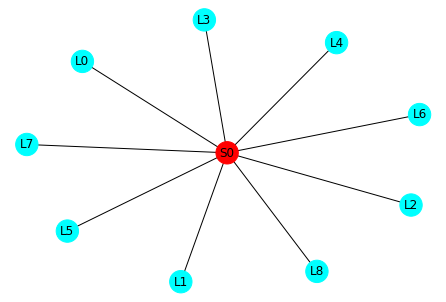

In [14]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [15]:
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Sending the data to the Neuron Object

In [16]:
nru = reload(nru)
save_time = time.time()
neuron_obj.save_compressed_neuron(output_folder="/notebooks/test_neurons/Fusion_decomp/",
                                 export_mesh=True,
                                 suppress_output=True)
print(f"Save time = {time.time() - save_time}")

Saving Neuorn in suppress_output mode...please wait
Saved File at location: /notebooks/test_neurons/Fusion_decomp/864691135738362516_thin_long_down_axon
Save time = 75.80005478858948


In [17]:
import neuron_visualizations as nviz
returned_colors = nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L6="all"),
                                       return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton
